In [8]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings

warnings.filterwarnings('ignore')

In [9]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [10]:
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
df = yf.download(tickers=symbols_list, 
                 start=start_date, 
                 end=end_date)
df = df.stack()
df

[*********************100%%**********************]  504 of 504 completed

2 Failed downloads:
['VLTO', 'SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Price               Adj Close       Close  ...        Open       Volume
Date       Ticker                          ...                         
2015-09-29 A        31.483559   33.740002  ...   33.360001    2252400.0
           AAL      37.361622   39.180000  ...   39.049999    7478800.0
           AAPL     24.684574   27.264999  ...   28.207500  293461600.0
           ABBV     36.674240   52.790001  ...   53.099998   12842800.0
           ABT      33.644737   39.500000  ...   39.259998   12287500.0
...                       ...         ...  ...         ...          ...
2023-09-26 XYL      88.968475   89.519997  ...   90.379997    1322400.0
           YUM     122.811577  124.010002  ...  124.239998    1500600.0
           ZBH     111.782722  112.459999  ...  116.769997    3610500.0
           ZBRA    223.960007  223.960007  ...  225.970001     355400.0
           ZTS     176.048233  176.869995  ...  176.580002    1463200.0

[993179 rows x 6 columns]

In [11]:
df.index.names = ['date', 'ticker']
df.columns = df.columns.str.lower()
df

Price               adj close       close  ...        open       volume
date       ticker                          ...                         
2015-09-29 A        31.483559   33.740002  ...   33.360001    2252400.0
           AAL      37.361622   39.180000  ...   39.049999    7478800.0
           AAPL     24.684574   27.264999  ...   28.207500  293461600.0
           ABBV     36.674240   52.790001  ...   53.099998   12842800.0
           ABT      33.644737   39.500000  ...   39.259998   12287500.0
...                       ...         ...  ...         ...          ...
2023-09-26 XYL      88.968475   89.519997  ...   90.379997    1322400.0
           YUM     122.811577  124.010002  ...  124.239998    1500600.0
           ZBH     111.782722  112.459999  ...  116.769997    3610500.0
           ZBRA    223.960007  223.960007  ...  225.970001     355400.0
           ZTS     176.048233  176.869995  ...  176.580002    1463200.0

[993179 rows x 6 columns]

In [12]:
#calculate features and technical indicators for each stock

In [13]:
#Garman-Klass Volatility
df['garman_klass_vol'] = (((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*(np.log(df['adj close'])-np.log(df['open']))**2)
df

Price               adj close       close  ...       volume  garman_klass_vol
date       ticker                          ...                               
2015-09-29 A        31.483559   33.740002  ...    2252400.0         -0.000998
           AAL      37.361622   39.180000  ...    7478800.0         -0.000443
           AAPL     24.684574   27.264999  ...  293461600.0         -0.005572
           ABBV     36.674240   52.790001  ...   12842800.0         -0.051964
           ABT      33.644737   39.500000  ...   12287500.0         -0.008803
...                       ...         ...  ...          ...               ...
2023-09-26 XYL      88.968475   89.519997  ...    1322400.0          0.000016
           YUM     122.811577  124.010002  ...    1500600.0          0.000002
           ZBH     111.782722  112.459999  ...    3610500.0          0.000099
           ZBRA    223.960007  223.960007  ...     355400.0          0.000133
           ZTS     176.048233  176.869995  ...    1463200.0          0.000072

[993179 rows x 7 columns]

<Axes: xlabel='date'>

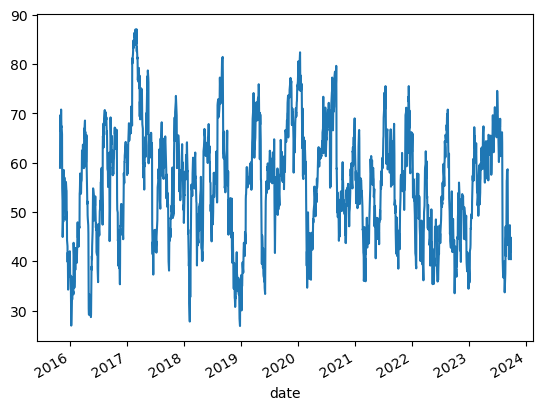

In [14]:
#RSI
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

#test
df.xs('AAPL', level=1)['rsi'].plot()

In [15]:
#Bollinger Bands
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
df

Price               adj close       close  ...    bb_mid   bb_high
date       ticker                          ...                    
2015-09-29 A        31.483559   33.740002  ...       NaN       NaN
           AAL      37.361622   39.180000  ...       NaN       NaN
           AAPL     24.684574   27.264999  ...       NaN       NaN
           ABBV     36.674240   52.790001  ...       NaN       NaN
           ABT      33.644737   39.500000  ...       NaN       NaN
...                       ...         ...  ...       ...       ...
2023-09-26 XYL      88.968475   89.519997  ...  4.570270  4.652196
           YUM     122.811577  124.010002  ...  4.846536  4.876502
           ZBH     111.782722  112.459999  ...  4.787752  4.827420
           ZBRA    223.960007  223.960007  ...  5.539167  5.677342
           ZTS     176.048233  176.869995  ...  5.217753  5.276568

[993179 rows x 11 columns]

In [16]:
#ATR
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'], 
                        low=stock_data['low'], 
                        close=stock_data['close'], 
                        length=14)
    #normalize data
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df

Price               adj close       close  ...   bb_high       atr
date       ticker                          ...                    
2015-09-29 A        31.483559   33.740002  ...       NaN       NaN
           AAL      37.361622   39.180000  ...       NaN       NaN
           AAPL     24.684574   27.264999  ...       NaN       NaN
           ABBV     36.674240   52.790001  ...       NaN       NaN
           ABT      33.644737   39.500000  ...       NaN       NaN
...                       ...         ...  ...       ...       ...
2023-09-26 XYL      88.968475   89.519997  ...  4.652196  0.033800
           YUM     122.811577  124.010002  ...  4.876502  0.142547
           ZBH     111.782722  112.459999  ...  4.827420 -0.381708
           ZBRA    223.960007  223.960007  ...  5.677342 -0.057389
           ZTS     176.048233  176.869995  ...  5.276568  0.651515

[993179 rows x 12 columns]

In [17]:
#MACD
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    #normalize data
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df

Price               adj close       close  ...       atr      macd
date       ticker                          ...                    
2015-09-29 A        31.483559   33.740002  ...       NaN       NaN
           AAL      37.361622   39.180000  ...       NaN       NaN
           AAPL     24.684574   27.264999  ...       NaN       NaN
           ABBV     36.674240   52.790001  ...       NaN       NaN
           ABT      33.644737   39.500000  ...       NaN       NaN
...                       ...         ...  ...       ...       ...
2023-09-26 XYL      88.968475   89.519997  ...  0.033800 -2.159188
           YUM     122.811577  124.010002  ...  0.142547 -1.363695
           ZBH     111.782722  112.459999  ... -0.381708 -0.881067
           ZBRA    223.960007  223.960007  ... -0.057389 -1.600791
           ZTS     176.048233  176.869995  ...  0.651515 -1.188278

[993179 rows x 13 columns]

In [18]:
#Dollar Volume in millions
df['dollar_volume'] = (df['adj close'] * df['volume'])/1e6
df

Price               adj close       close  ...      macd  dollar_volume
date       ticker                          ...                         
2015-09-29 A        31.483559   33.740002  ...       NaN      70.913568
           AAL      37.361622   39.180000  ...       NaN     279.420098
           AAPL     24.684574   27.264999  ...       NaN    7243.974619
           ABBV     36.674240   52.790001  ...       NaN     470.999931
           ABT      33.644737   39.500000  ...       NaN     413.409709
...                       ...         ...  ...       ...            ...
2023-09-26 XYL      88.968475   89.519997  ... -2.159188     117.651912
           YUM     122.811577  124.010002  ... -1.363695     184.291052
           ZBH     111.782722  112.459999  ... -0.881067     403.591519
           ZBRA    223.960007  223.960007  ... -1.600791      79.595386
           ZTS     176.048233  176.869995  ... -1.188278     257.593775

[993179 rows x 14 columns]

In [19]:
#aggregate to monthly level and filter top 150 most liquid stocks for each month
#reduces training time and experiment with features and strategies, convert business-daily data to month-end frequency
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]

data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                  axis=1)).dropna()

data

dollar_volume   adj close  ...       atr      macd
date       ticker                             ...                    
2015-11-30 A          135.992830   39.023182  ... -1.033887  0.567157
           AAL        287.915802   39.429939  ...  0.190822 -0.418772
           AAPL      4029.442048   26.890568  ... -0.967900 -0.142789
           ABBV       340.716442   40.770767  ... -0.526809  0.145677
           ABT        212.708758   38.483490  ... -1.064842  0.335557
...                          ...         ...  ...       ...       ...
2023-09-30 OTIS       154.983159   78.671936  ... -1.028320 -1.534536
           ABNB      1633.500725  132.279999  ... -1.006939 -0.037854
           CEG        196.971017  108.026909  ... -0.436215  0.366876
           GEHC       212.350630   66.153511  ... -0.893478 -1.116463
           KVUE       677.910277   20.218124  ... -0.899746 -1.435621

[46894 rows x 9 columns]

In [20]:
#calculate 5-year rolling average of dollar volume for each stocks before filtering
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))
data =data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol  ...       atr      macd
date       ticker                                ...                    
2016-10-31 AAL      39.134323         -0.000176  ...  0.402199  1.131595
           AAPL     26.248030         -0.002384  ... -1.038688 -0.195978
           ABBV     40.620972         -0.044217  ... -0.893132 -0.760594
           ABT      34.463539         -0.006968  ... -1.035224 -0.650888
           ACN     103.970665         -0.004320  ... -0.996806 -0.135456
...                       ...               ...  ...       ...       ...
2023-09-30 WMT      53.783062         -0.000011  ... -0.196381  0.399459
           XOM     114.292961          0.000026  ...  0.601335  1.400623
           MRNA     98.120003          0.000146  ... -0.529511 -0.376899
           UBER     44.270000          0.000441  ... -0.746098 -0.133973
           ABNB    132.279999          0.000213  ... -1.006939 -0.037854

[12516 rows x 8 columns]

In [21]:
#calculate monthly returns for different time horizons as features
def calculate_returns(df):
    
    outlier_cutoff = 0.005
    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close']
                            .pct_change(lag)
                            .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                    upper=x.quantile(1-outlier_cutoff)))
                            .add(1)
                            .pow(1/lag)
                            .sub(1))
    return df    

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data

adj close  garman_klass_vol  ...  return_9m  return_12m
date       ticker                                ...                       
2017-10-31 AAL      45.534168         -0.000363  ...   0.007008    0.012702
           AAPL     39.767761         -0.000998  ...   0.038941    0.035228
           ABBV     68.121460         -0.031904  ...   0.047273    0.044026
           ABT      48.733875         -0.004755  ...   0.031320    0.029294
           ACN     129.900742         -0.003628  ...   0.027398    0.018728
...                       ...               ...  ...        ...         ...
2023-09-30 WMT      53.783062         -0.000011  ...   0.016553    0.020256
           XOM     114.292961          0.000026  ...   0.008747    0.027037
           MRNA     98.120003          0.000146  ...  -0.064976   -0.015431
           UBER     44.270000          0.000441  ...   0.066838    0.043691
           ABNB    132.279999          0.000213  ...   0.049124    0.019401

[10341 rows x 14 columns]

In [22]:
#fama-french factors
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2010')[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()

factor_data


Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10341 rows x 6 columns]

In [23]:
#check my work
factor_data.xs('AAPL', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2017-10-31,0.0225,-0.0194,0.0020,0.0093,-0.0325,0.096808
2017-11-30,0.0312,-0.0033,-0.0003,0.0316,-0.0005,0.020278
2017-12-31,0.0106,-0.0107,0.0006,0.0074,0.0169,-0.015246
2018-01-31,0.0557,-0.0318,-0.0129,-0.0076,-0.0096,-0.010636
2018-02-28,-0.0365,0.0032,-0.0104,0.0052,-0.0237,0.068185


In [24]:
#check my work
factor_data.xs('MSFT', level=1).head()

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2017-10-31,0.0225,-0.0194,0.0020,0.0093,-0.0325,0.116660
2017-11-30,0.0312,-0.0033,-0.0003,0.0316,-0.0005,0.016984
2017-12-31,0.0106,-0.0107,0.0006,0.0074,0.0169,0.016277
2018-01-31,0.0557,-0.0318,-0.0129,-0.0076,-0.0096,0.110708
2018-02-28,-0.0365,0.0032,-0.0104,0.0052,-0.0237,-0.008415


In [25]:
#filter out stocks with less than 10 months of data
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >= 10]

factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]

factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10302 rows x 6 columns]

In [26]:
# calculate rolling factor betas
betas = factor_data.groupby(level=1, group_keys=False).apply(
    lambda x: RollingOLS(
        endog=x["return_1m"],
        exog=sm.add_constant(x.drop("return_1m", axis=1)),
        window=min(24, x.shape[0]),
        min_nobs=len(x.columns) + 1,
    )
    .fit(params_only=True)
    .params.drop("const", axis=1)
)
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.456426 -0.445902 -0.312668 -0.079430  0.800286
           VZ      0.332656 -0.165645  0.267343  0.310366  0.106903
           WFC     1.121746  0.300522  2.061532 -0.439489 -1.517556
           WMT     0.700556 -0.315601 -0.413431 -0.142907  0.508470
           XOM     0.983510 -1.093759  1.756776 -0.640866 -0.368455

[10302 rows x 5 columns]

In [27]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data = (data.join(betas.groupby('ticker').shift()))
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data = data.drop('adj close', axis=1)
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10090 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'UBER')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10090 non-null  float64
 1   rsi               10090 non-null  float64
 2   bb_low            10090 non-null  float64
 3   bb_mid            10090 non-null  float64
 4   bb_high           10090 non-null  float64
 5   atr               10090 non-null  float64
 6   macd              10090 non-null  float64
 7   return_1m         10090 non-null  float64
 8   return_2m         10090 non-null  float64
 9   return_3m         10090 non-null  float64
 10  return_6m         10090 non-null  float64
 11  return_9m         10090 non-null  float64
 12  return_12m        10090 non-null  float64
 13  Mkt-RF            10090 non-null  float64
 14  SMB               10090 non-null  float64
 15  HML       

In [28]:
#apply pre-defined centroids
target_rsi_values = [30,45,55,70]
initial_centroids = np.zeros((len(target_rsi_values), 18))
initial_centroids[:,1] = target_rsi_values
initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [29]:
#ML model and approach to use for predictions
#for each month fit a K-Means Clustering Algo to group similar assets based on their features
from sklearn.cluster import KMeans

#data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi  ...       CMA  cluster
date       ticker                               ...                   
2017-10-31 AAL            -0.000363  41.051798  ...  0.563294        1
           AAPL           -0.000998  69.196765  ...  0.458077        3
           ABBV           -0.031904  55.247890  ...  0.164918        2
           ABT            -0.004755  53.844882  ...  0.970210        2
           ACN            -0.003628  69.365247  ...  0.168884        3
...                             ...        ...  ...       ...      ...
2023-09-30 WFC             0.000016  40.920280  ... -1.468838        1
           WMT            -0.000011  54.722557  ...  0.642626        3
           XOM             0.000026  59.440186  ... -0.284025        3
           MRNA            0.000146  38.747314  ...  0.993548        1
           UBER            0.000441  45.005268  ... -0.450323        2

[10090 rows x 19 columns]

In [30]:
def plot_clustors(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    
    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,1], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,1], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,1], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,1], color='black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return
    

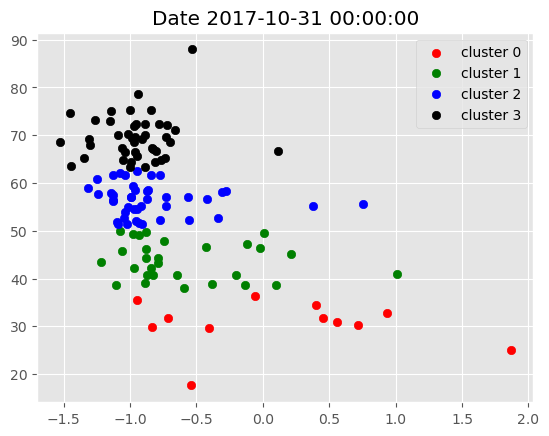

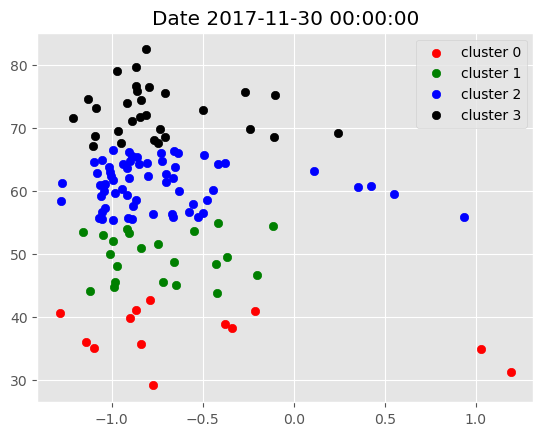

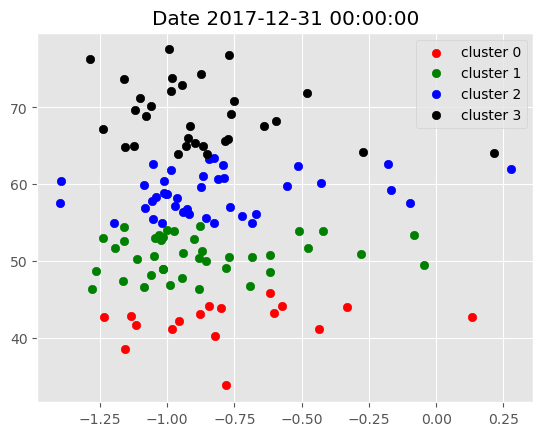

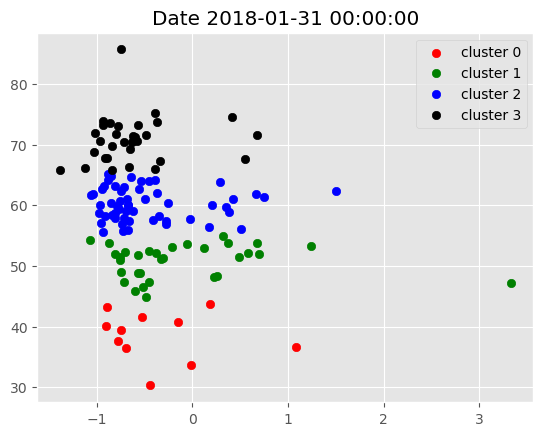

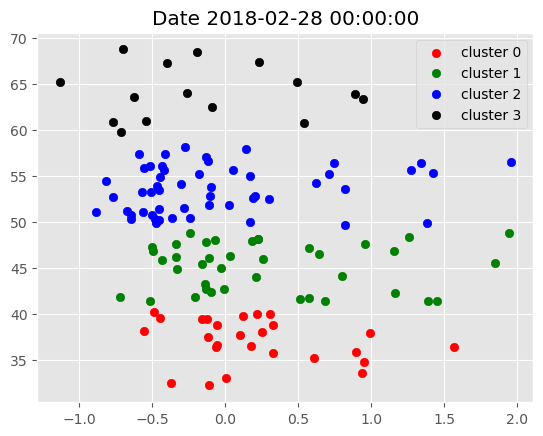

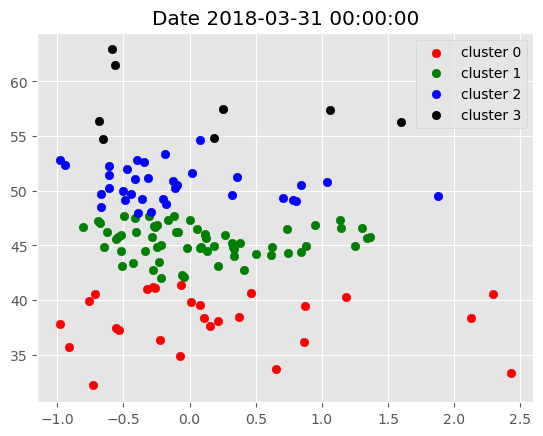

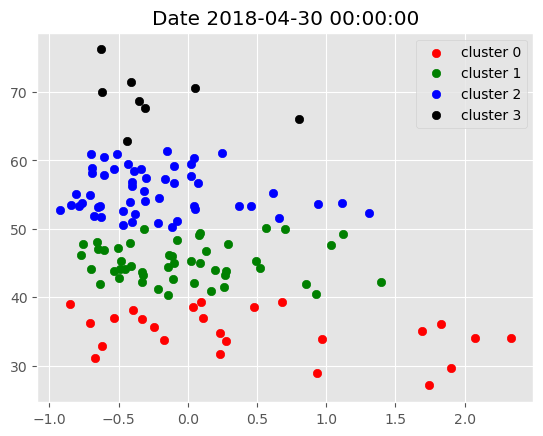

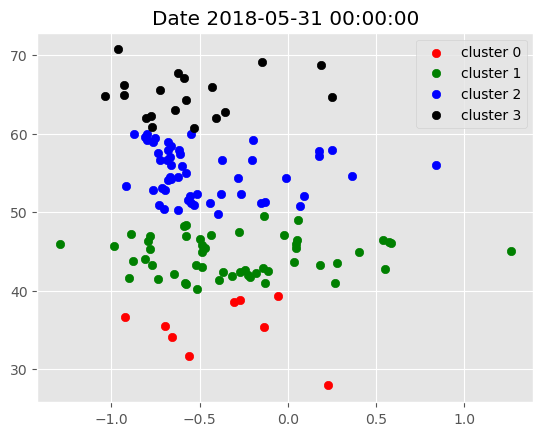

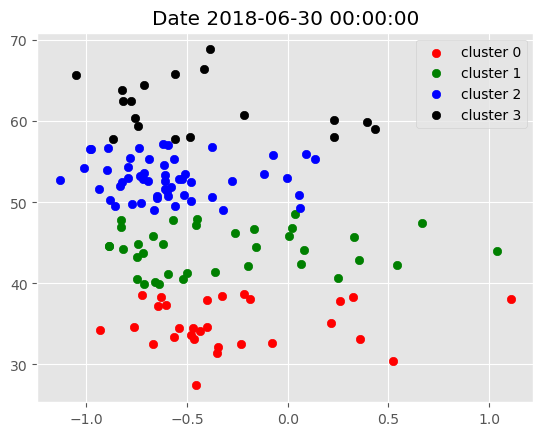

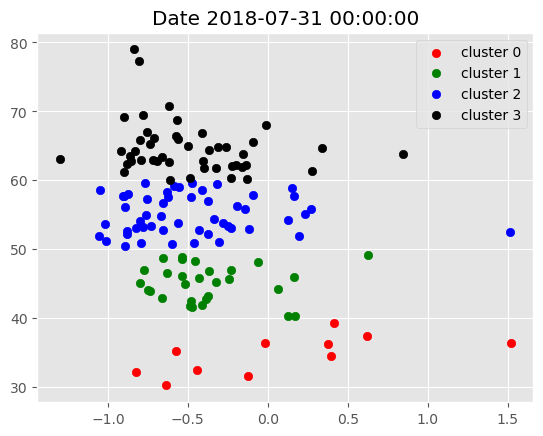

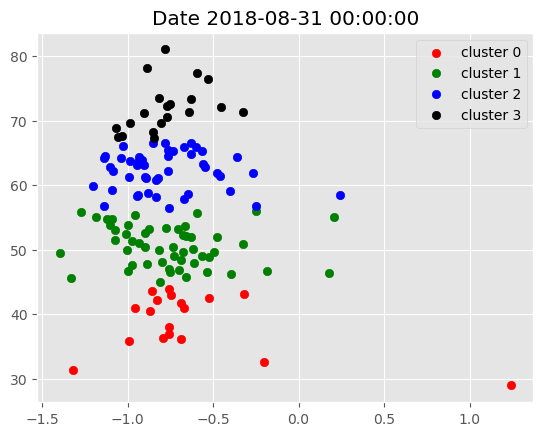

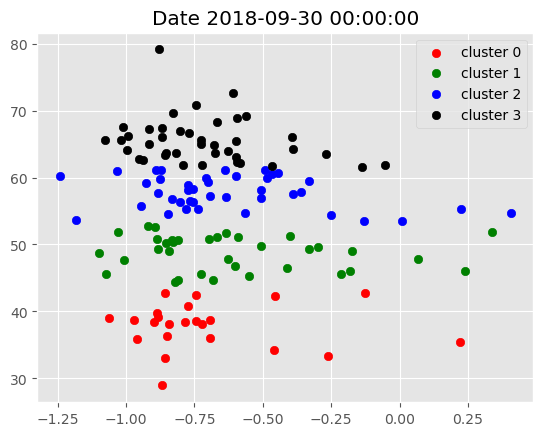

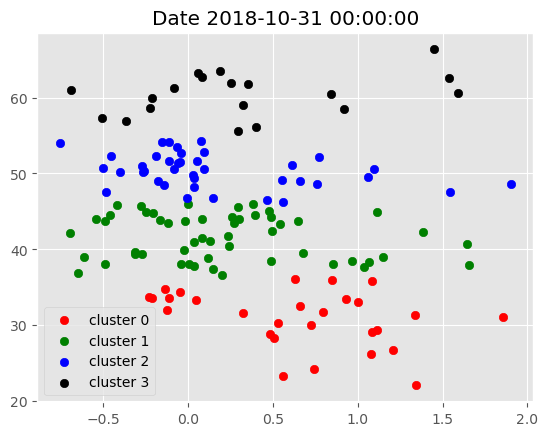

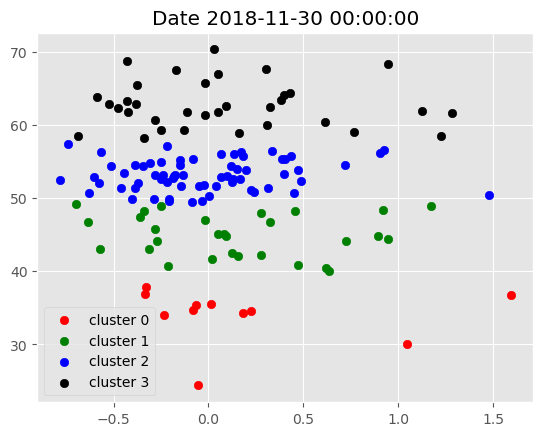

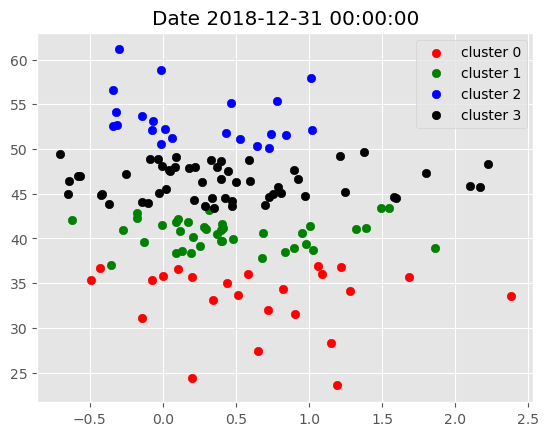

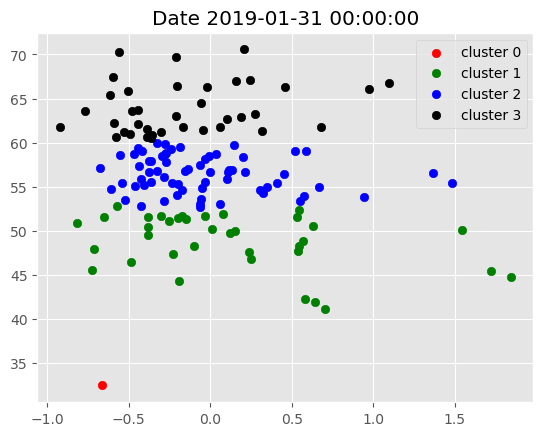

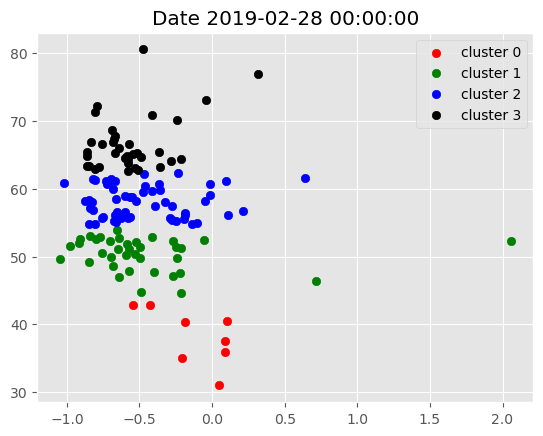

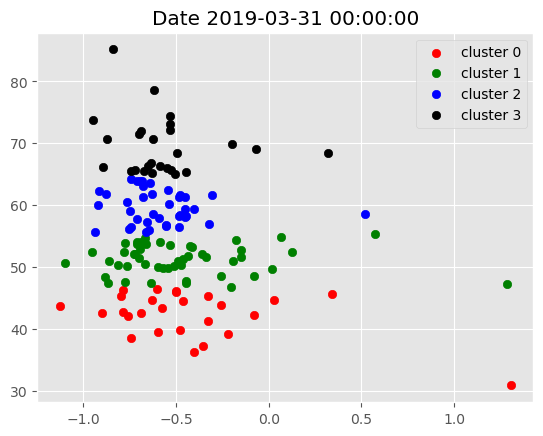

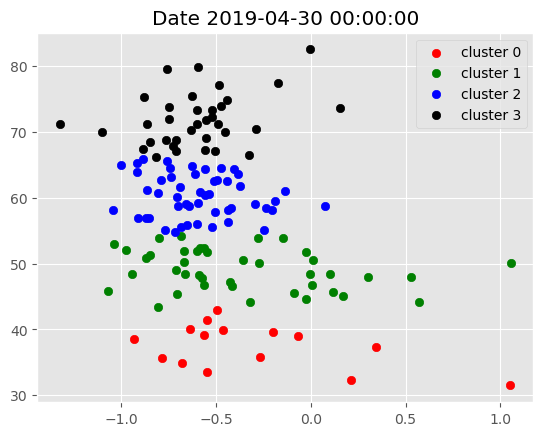

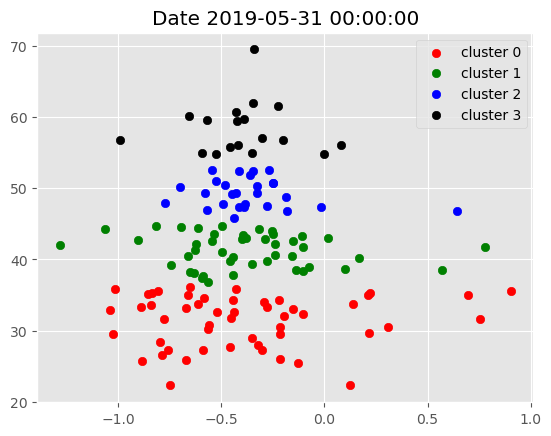

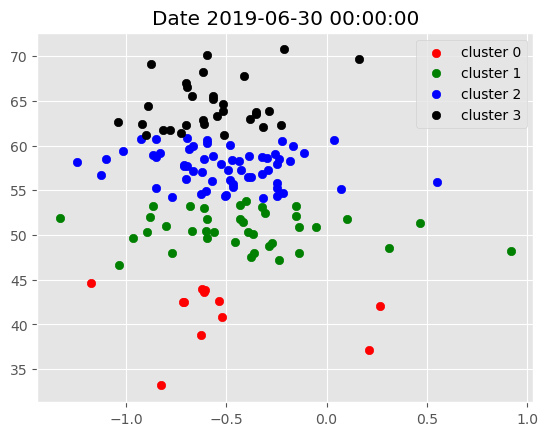

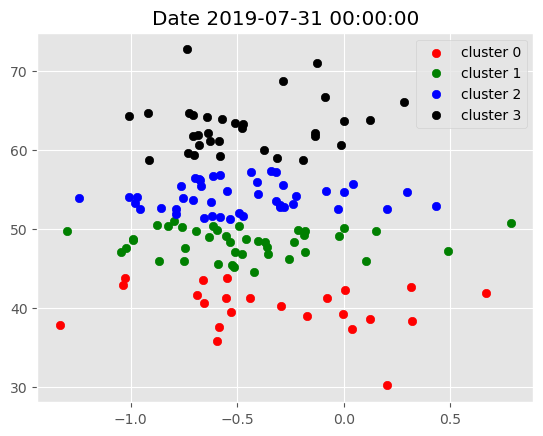

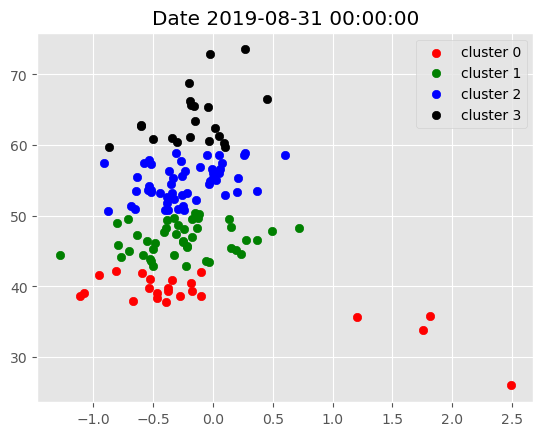

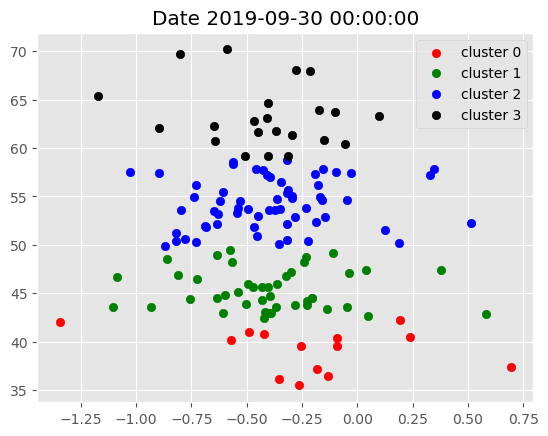

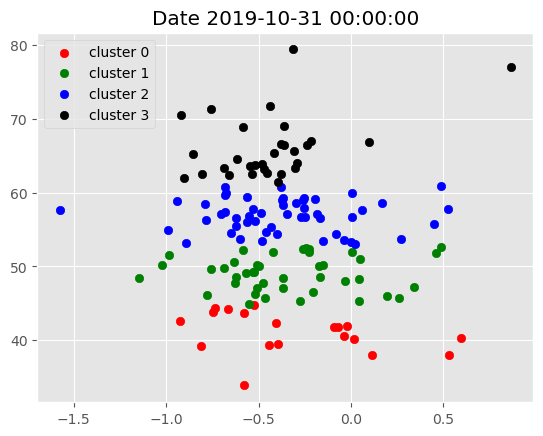

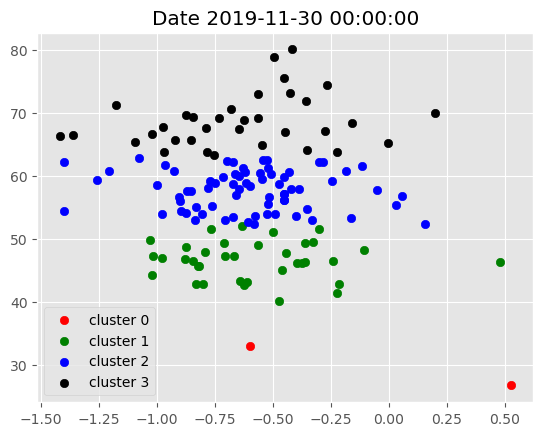

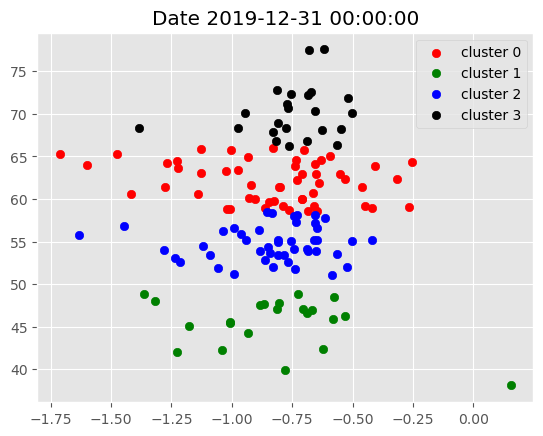

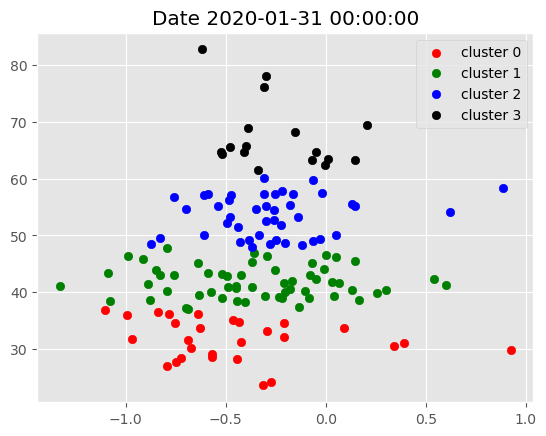

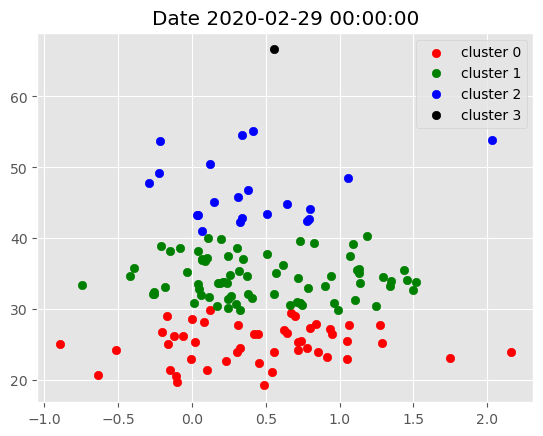

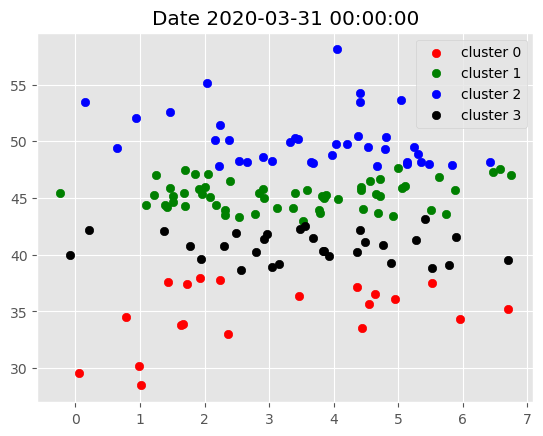

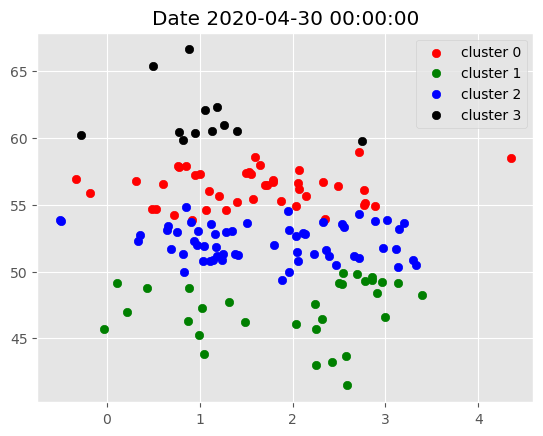

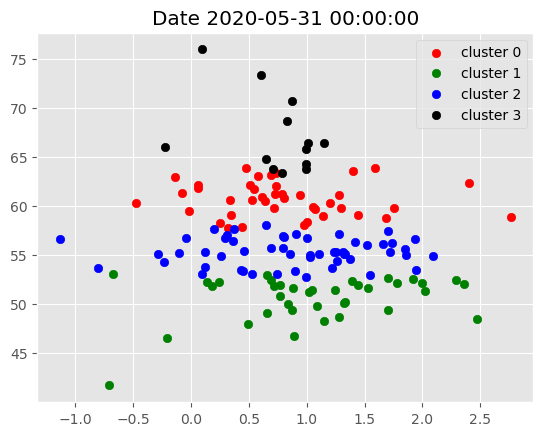

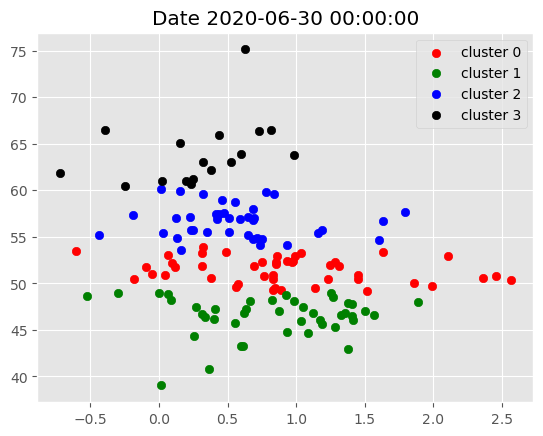

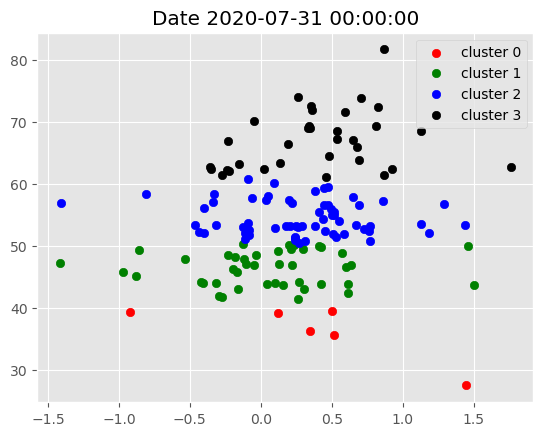

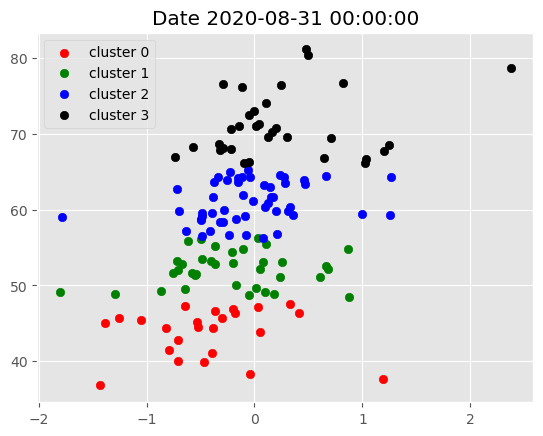

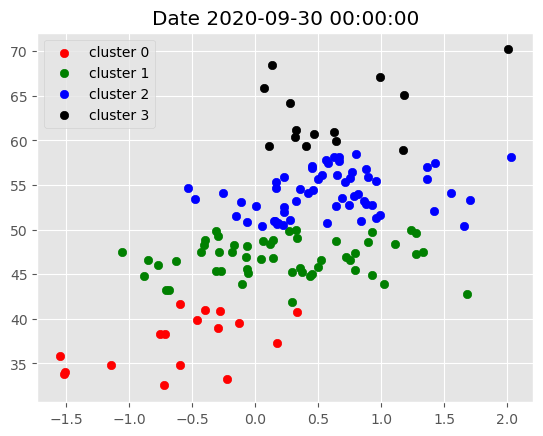

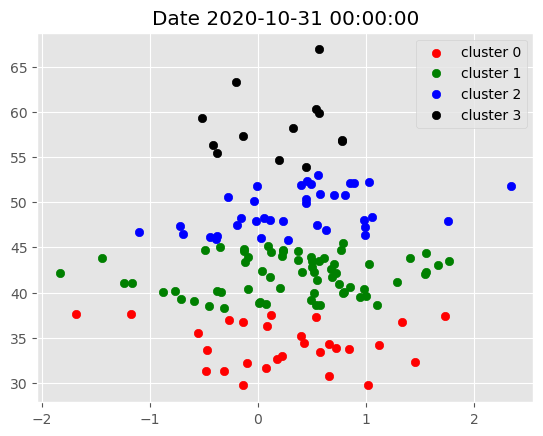

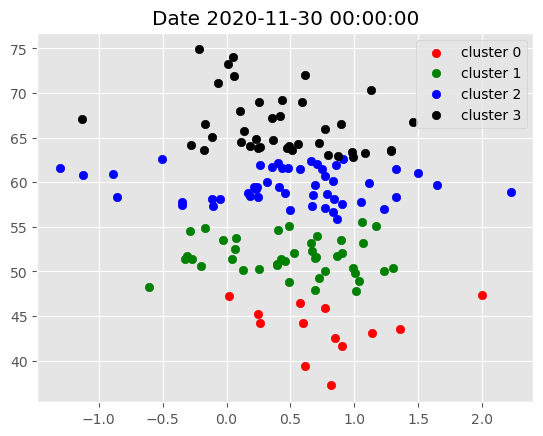

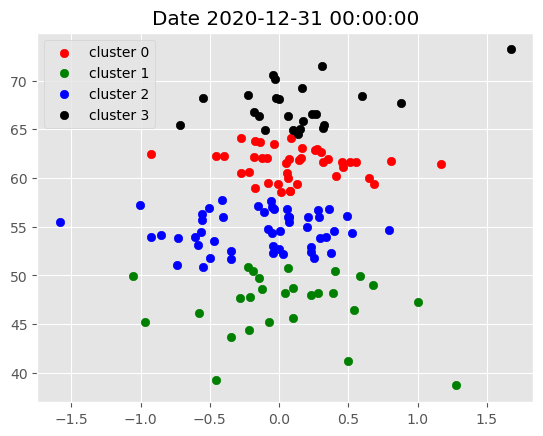

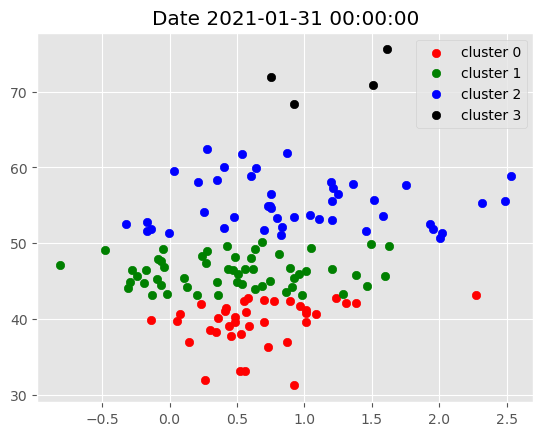

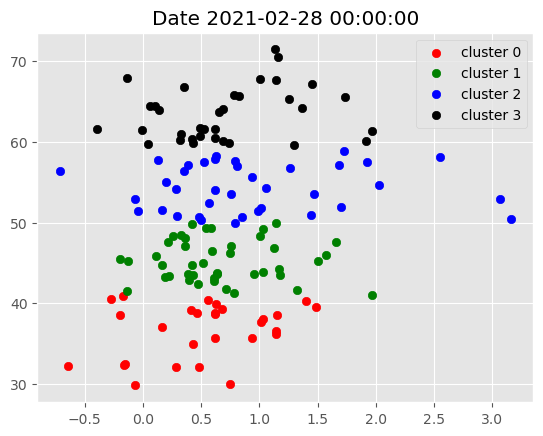

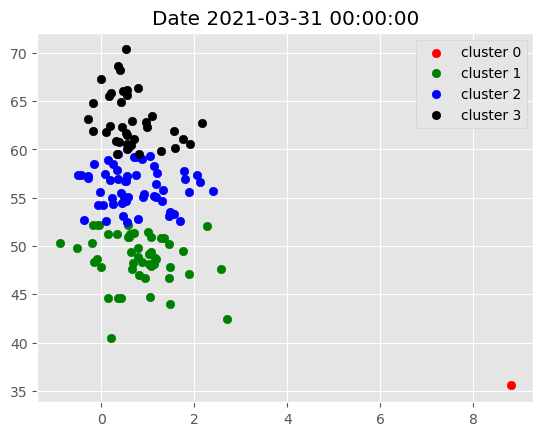

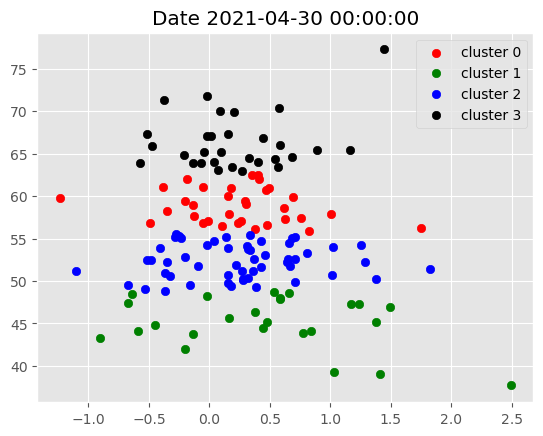

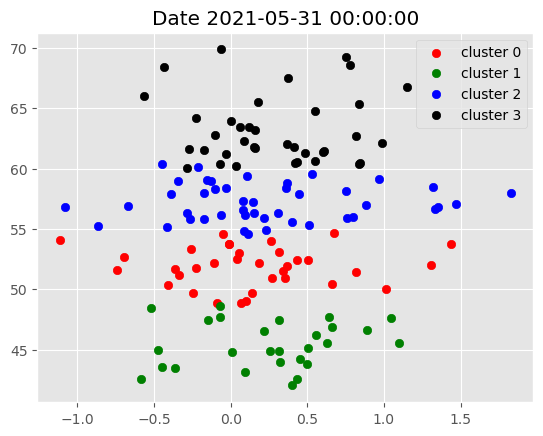

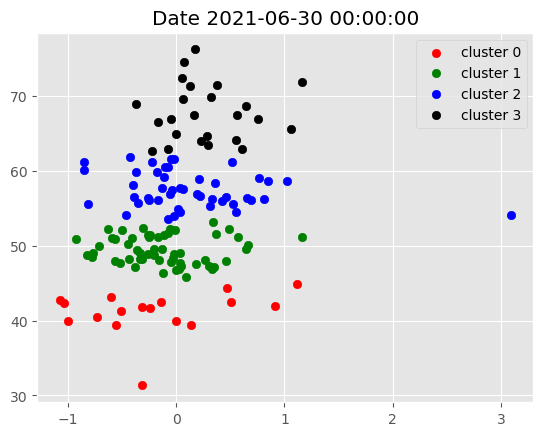

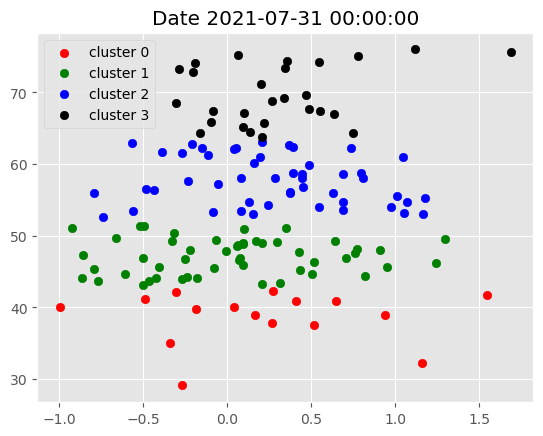

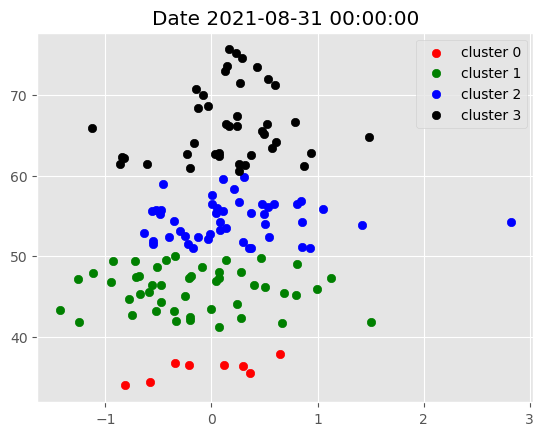

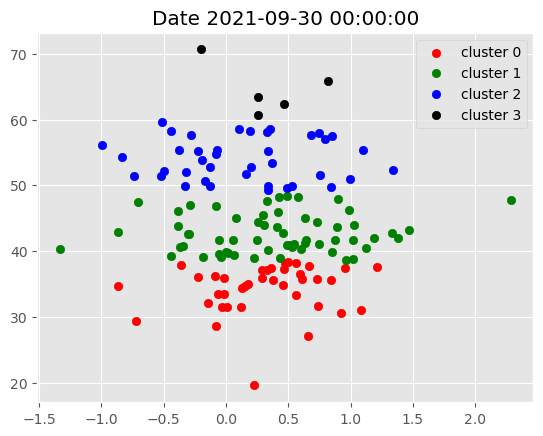

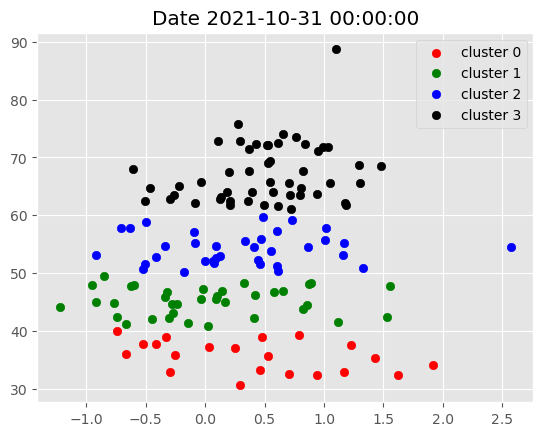

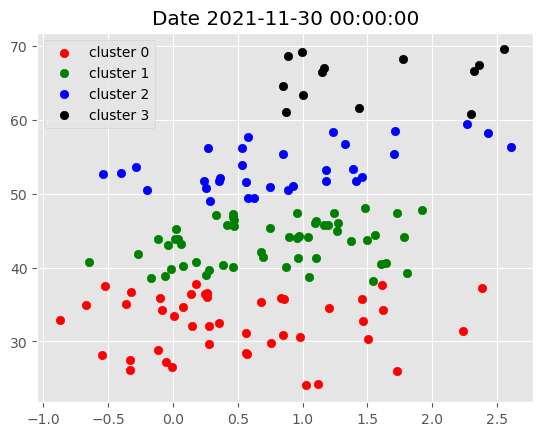

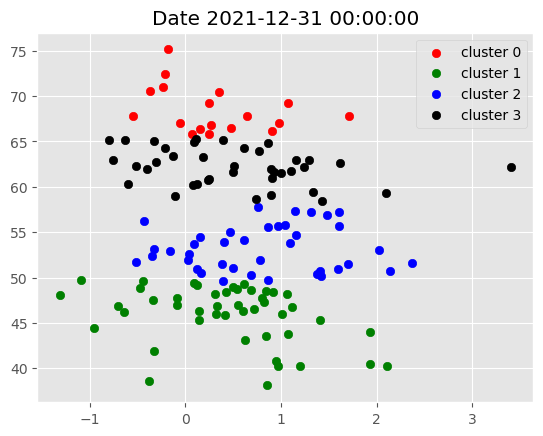

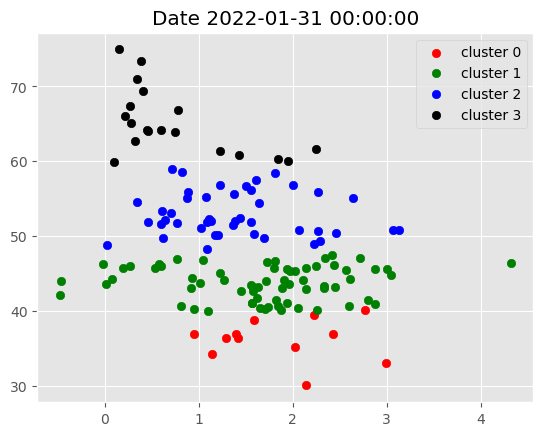

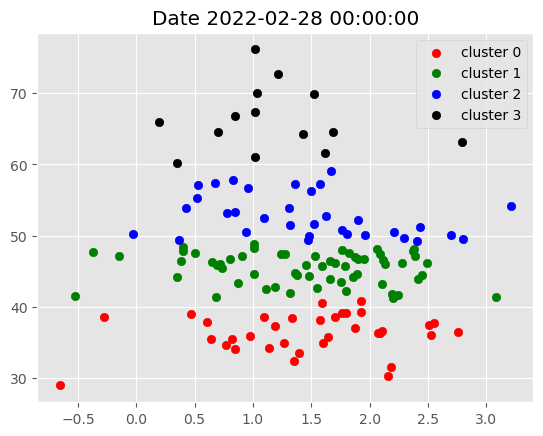

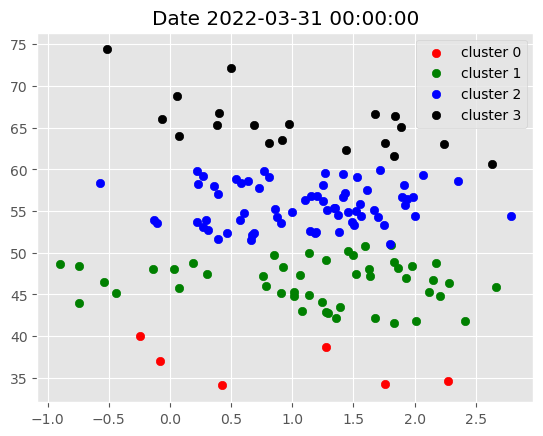

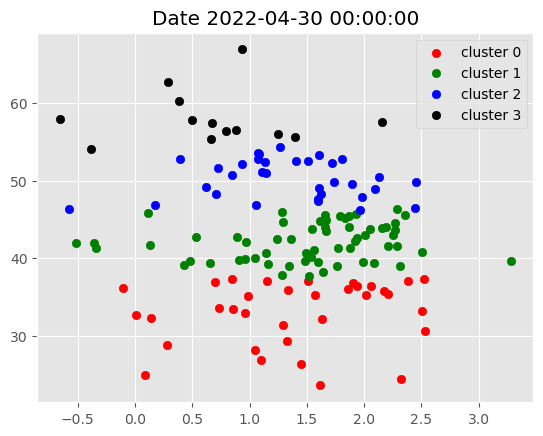

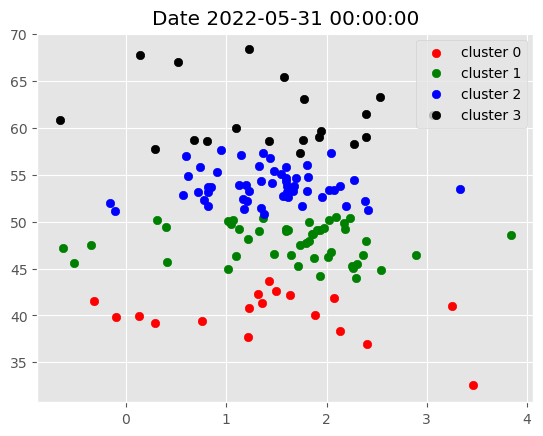

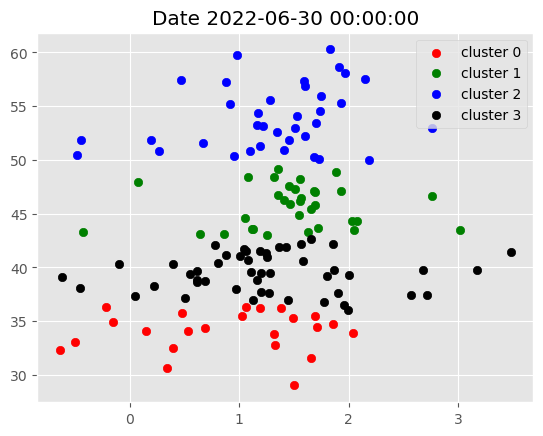

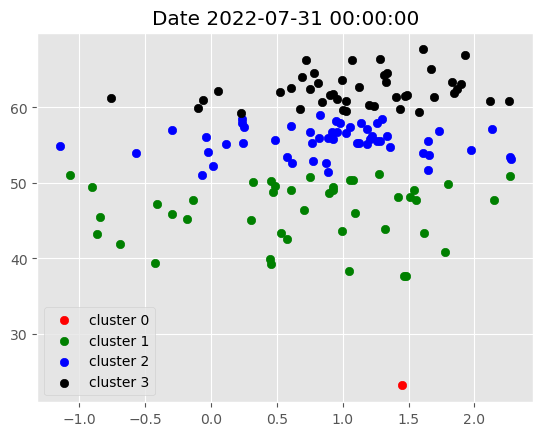

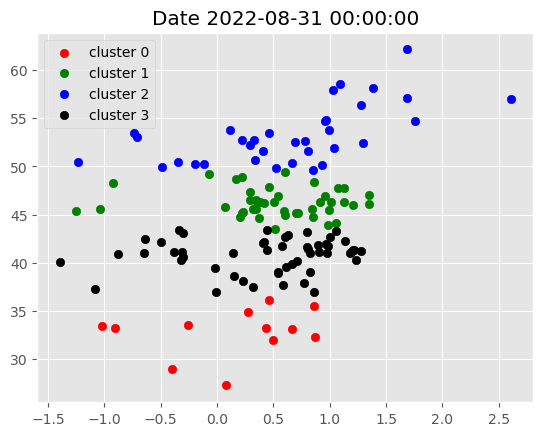

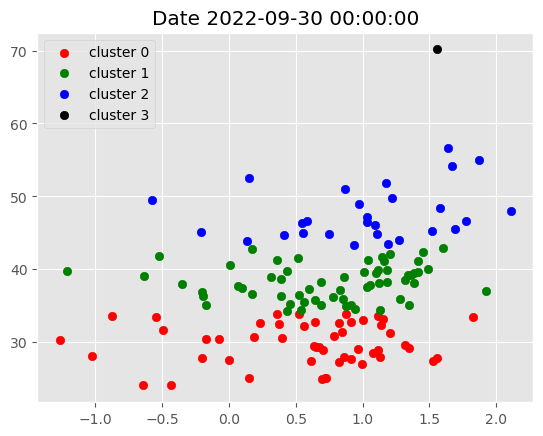

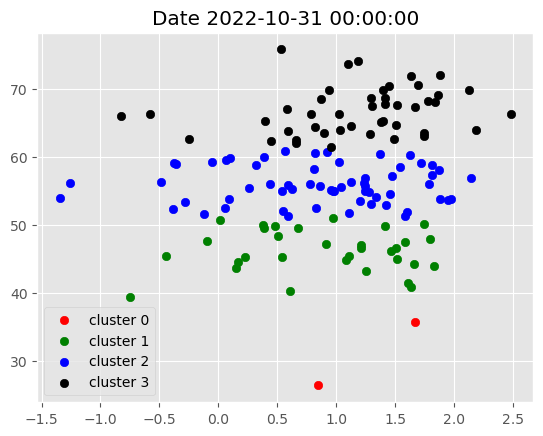

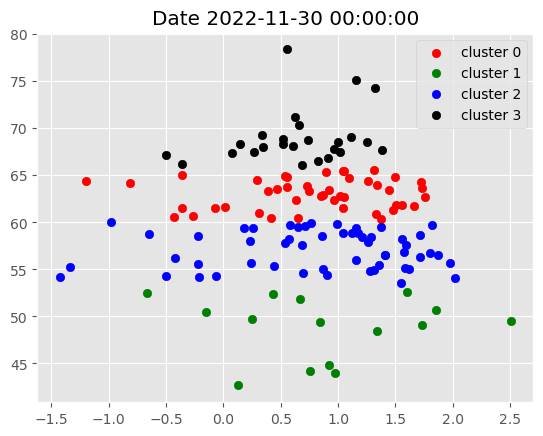

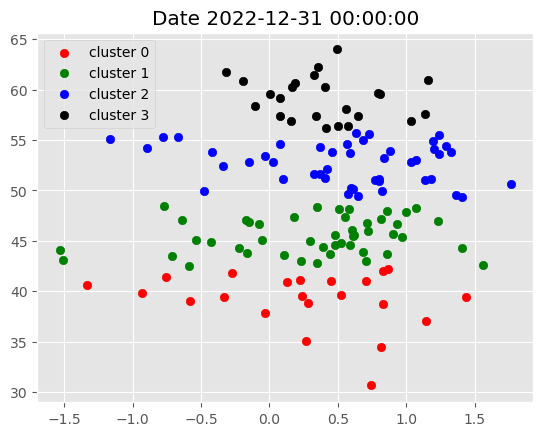

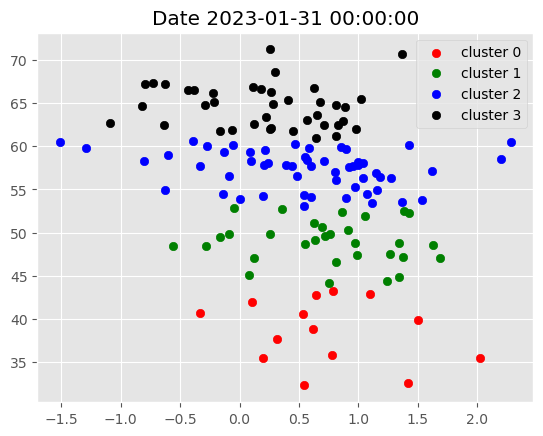

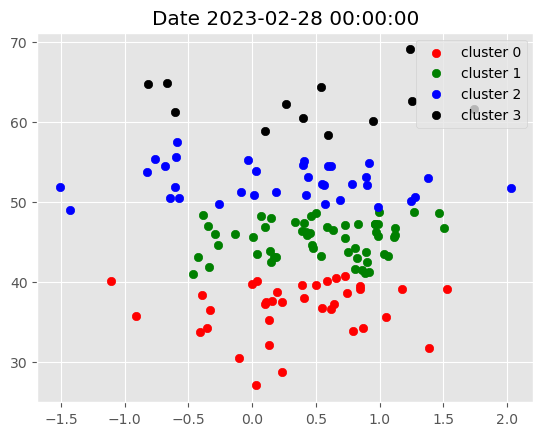

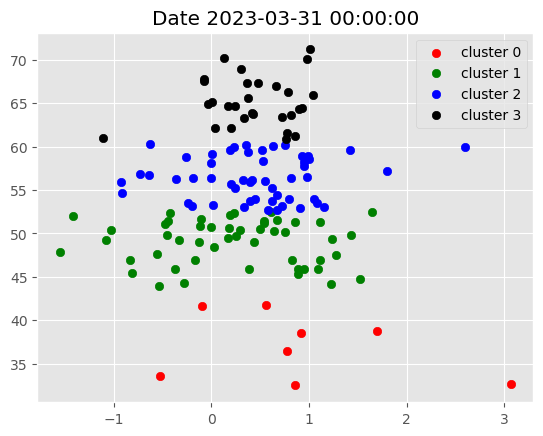

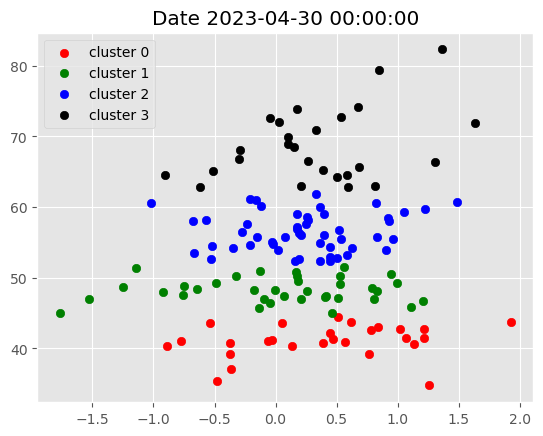

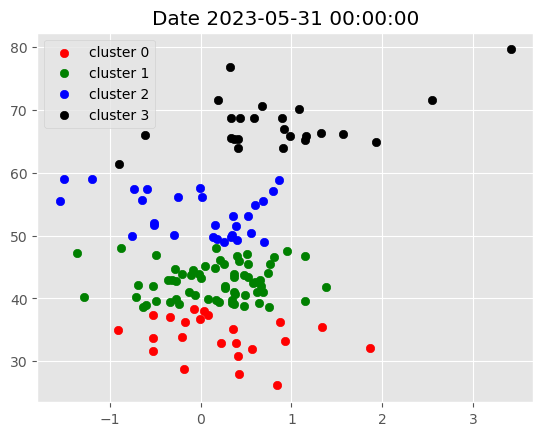

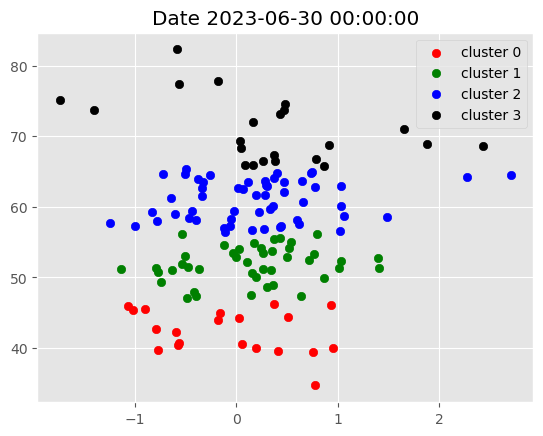

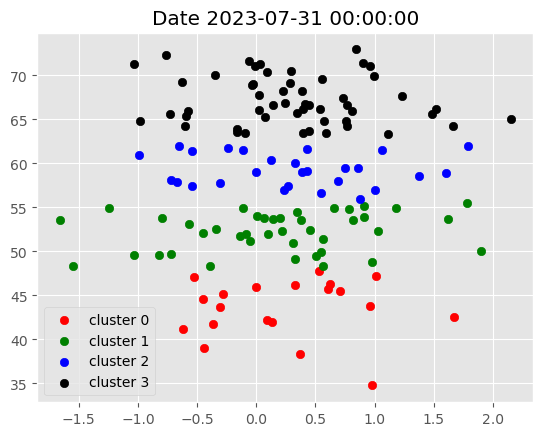

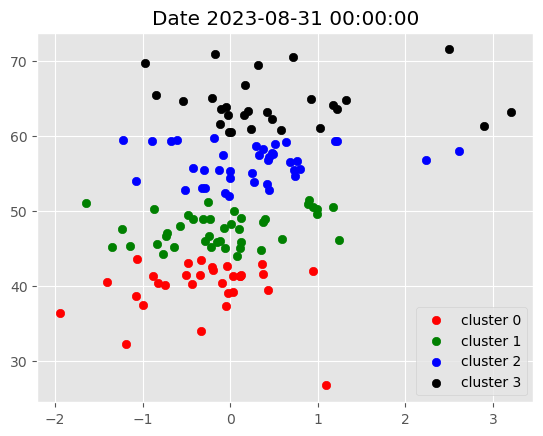

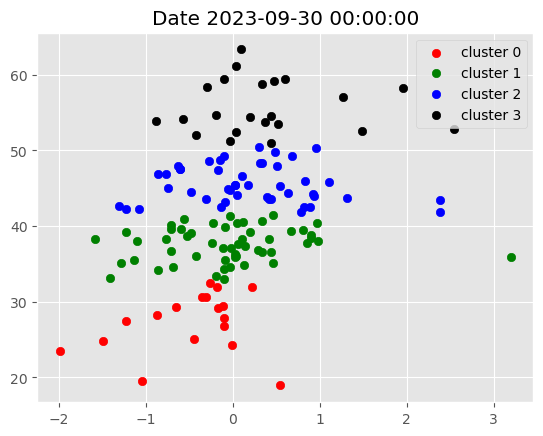

In [31]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f'Date {i}')
    plot_clustors(g)

In [32]:
#for each month, select stocks based on the cluster and form a portfolio based on efficient frontier max sharpe ratio optimization
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2017-11-01': ['AAPL',
  'ACN',
  'ADBE',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BAC',
  'CAT',
  'COP',
  'CRM',
  'CTSH',
  'DE',
  'DHR',
  'DLTR',
  'ELV',
  'EOG',
  'GOOG',
  'GOOGL',
  'INTC',
  'ISRG',
  'JPM',
  'MA',
  'MAR',
  'MCD',
  'MET',
  'META',
  'MMM',
  'MSFT',
  'MU',
  'NEE',
  'NVDA',
  'NXPI',
  'ORCL',
  'PYPL',
  'SHW',
  'STZ',
  'TXN',
  'UNH',
  'V',
  'VLO',
  'WMT',
  'XOM'],
 '2017-12-01': ['AMZN',
  'AXP',
  'AZO',
  'BA',
  'BAC',
  'BRK-B',
  'CAT',
  'COST',
  'CSCO',
  'DE',
  'DLTR',
  'ELV',
  'HD',
  'HON',
  'ILMN',
  'JPM',
  'KR',
  'LUV',
  'MAR',
  'MMM',
  'NKE',
  'ORLY',
  'OXY',
  'SCHW',
  'UNH',
  'UNP',
  'VLO',
  'VZ',
  'WMT'],
 '2018-01-01': ['ACN',
  'BA',
  'BAC',
  'CAT',
  'CSCO',
  'CVX',
  'DAL',
  'DE',
  'DG',
  'EOG',
  'FCX',
  'FDX',
  'HAL',
  'HD',
  'KR',
  'LOW',
  'LUV',
  'MAR',
  'OXY',
  'PEP',
  'PXD',
  'RTX',
  'STZ',
  'T',
  'TXN',
  'UAL',
  'UNP',
  'VLO',
  'VZ',
  'WMT',
  'WYNN'],
 '2018-02-01': ['

In [33]:
#define portfolio optimization function
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [34]:
def optimize_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(prices=prices,frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound,.1),
                           solver='SCS')
    weights = ef.max_sharpe()
    return ef.clean_weights()
    

In [35]:
#download fresh daily prices data only for short listed stocks
stocks = data.index.get_level_values('ticker').unique().tolist()
new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])
new_df

[*********************100%%**********************]  155 of 155 completed


Price       Adj Close                          ...    Volume                   
Ticker            AAL        AAPL        ABBV  ...       WMT     WYNN       XOM
Date                                           ...                             
2016-10-31  39.134331   26.248034   40.620975  ...  19167000  1341600  16663800
2016-11-01  38.363209   25.774115   41.108883  ...  26515800  3722300  13050600
2016-11-02  38.276459   25.797234   41.356491  ...  22935900  2542400  11226100
2016-11-03  38.054203   25.520714   40.701069  ...  20411700  9050400   8836500
2016-11-04  38.402084   25.290668   40.810314  ...  21786300  3223800  13877100
...               ...         ...         ...  ...       ...      ...       ...
2023-09-25  12.910000  175.624237  151.668289  ...  10459500  1387800  11316000
2023-09-26  12.700000  171.514893  150.942551  ...  14435700  1454000  11805400
2023-09-27  12.610000  169.988846  150.177597  ...  15711000  2050000  23976200
2023-09-28  12.920000  170.248184  149.314560  ...  11617200  1290400  16808100
2023-09-29  12.810000  170.766846  146.186050  ...  18842400  1326800  18810700

[1740 rows x 930 columns]

In [58]:
returns_df = np.log(new_df['Adj Close']).diff()
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        opt_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        opt_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
   
        #print(start_date)
        #print(end_date)
        #print(cols)
        #print(opt_start_date)
        #print(opt_end_date)

        opt_df = new_df[opt_start_date:opt_end_date]['Adj Close'][cols]
        success = False
        
        try:
            weights = optimize_weights(prices=opt_df,
                               lower_bound=round(1/(len(opt_df.columns)*2),3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success=True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with equal weights')
            
        if success == False:
            weights = pd.DataFrame([1/len(opt_df.columns) for i in range(len(opt_df.columns))],
                                   index=opt_df.columns.tolist(),
                                   columns=pd.Series(0)).T
        
        temp_df = returns_df[start_date:end_date]
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0).merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True), 
                                        left_index=True, 
                                        right_index=True).reset_index().set_index(['Date', 'index']).unstack().stack()
    except Exception as e:
        print(e)

"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2018-04-01, Continuing with equal weights
"None of ['index'] are in the columns"
Max Sharpe Optimization failed for 2018-05-01, Continuing with equal weights
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in the columns"
"None of ['index'] are in t

In [61]:
opt_df = new_df['2016-11-01':'2017-10-30']['Adj Close'][fixed_dates['2017-11-01']]
fixed_dates['2017-11-01']

['AAPL',
 'ACN',
 'ADBE',
 'AMAT',
 'AMZN',
 'AVGO',
 'AXP',
 'BAC',
 'CAT',
 'COP',
 'CRM',
 'CTSH',
 'DE',
 'DHR',
 'DLTR',
 'ELV',
 'EOG',
 'GOOG',
 'GOOGL',
 'INTC',
 'ISRG',
 'JPM',
 'MA',
 'MAR',
 'MCD',
 'MET',
 'META',
 'MMM',
 'MSFT',
 'MU',
 'NEE',
 'NVDA',
 'NXPI',
 'ORCL',
 'PYPL',
 'SHW',
 'STZ',
 'TXN',
 'UNH',
 'V',
 'VLO',
 'WMT',
 'XOM']

In [60]:
cols

['ABBV',
 'AMGN',
 'AZO',
 'CHTR',
 'CI',
 'COP',
 'COST',
 'CVS',
 'CVX',
 'FDX',
 'HUM',
 'LLY',
 'MPC',
 'REGN',
 'SLB',
 'T',
 'TMUS',
 'UNH',
 'VLO',
 'VRTX',
 'WMT',
 'XOM']